### Hypothesis tests

### Task 1:
Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students 
from a Dublin secondary school.
For task 1, we want to test the hypothesis that the teacher's suspicion that the average is below the national average of 70%. So, in this case, we want to analyze two averages of the same population.

The first step is to analyze if it is different from the population average and for this, it is important to choose an appropriate statistical test.
 Defining hypothesis:
 1. State the Null Hypothesis: Mean score = 70%
 2. Alternative Hypothesis: Mean score  < 70%

Before choosing the appropriate hypothesis test, it is necessary to test the normality of the data distribution. In some statistical tests, if the distribution of data, errors or differences is not normal, it is necessary to do some kind of transformation or use a non-parametric version (Mello, 2012). Verifying normality of distribution is a requirement for running several of the well-known statistical tests such as Student’s t-test and ANOVA (Biostats, n.d.). ndings.

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats as stats
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [213]:
df = pd.read_csv("Q1.csv")

In [214]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  50 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


In [216]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


Checking histogram
First let's check if DF has normal distribution.


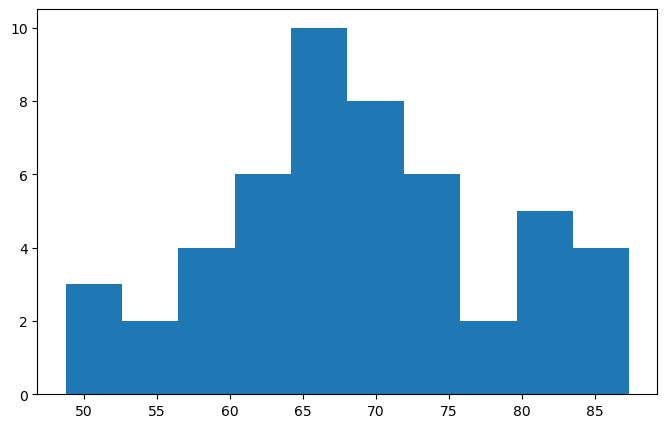

In [217]:
plt.figure(figsize=(8,5))
plt.hist(df['exam_score'])
plt.show()
#sns.displot(df['exam_score'], kde=True, color='skyblue')

According to the histogram, the data appears to have a normal distribution, but to confirm this, we will perform a statistical test to verify.

We have 4 main Normality Tests
1. Shapiro-Wilk; 
2. Kolmogorov-Smirnov;
3. Lilliefors; 
4. Anderson-Darlin
   1. Shapiro-Wilk
Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed(Malato, 2023).
    2. Kolmogorov-Smirnov
This test compares the ECDF (empirical cumulative distribution function) of your sample data with the distribution expected if the data were normal. If this observed difference is adequately large, the test will reject the null hypothesis of population normality. If the p-value of this test is less than your chosen α, you can reject your null hypothesis and conclude that the population is nonnormal (support.minitab.com, n.d.).
    3. Lilliefors
The Lilliefors test is a variant of the Kolmogorov-Smirnov test that is specifically designed to test normality. It evaluates whether the data comes from a normal distribution by comparing the empirical distribution function of the data with the expected normal cumulative distribution function (RCODER, 2023).
    4. 
The Anderson-Darling test has a similar objective to that of the Kolmogorov-Smirnov test, but it is more powerful. This is so since all the data values are considered, not just the one that produces the maximum difference. Also, more weight is given to the tails of the distribution being fitted. Generally, this test should be used instead of the Kolmogorov-Smirnov test (Real-statistics.com, 2024).


The Shapiro–Wilk test is more appropriate method for small sample sizes (<50 samples) although it can also be handling on larger sample size while Kolmogorov–Smirnov test is used for n ≥50. For both of the above tests, null hypothesis states that data are taken from normal distributed population. When P > 0.05, null hypothesis accepted and data are called as normally distributed (Mishra et al., 2019).

The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution(Zach, 2020).

In [218]:
from  scipy.stats import shapiro
stat, p = shapiro(df['exam_score'])
print ('stat=%.2f, p=%.30f' % (stat, p))
if p > 0.05:
    print('normal distribution')
else:
    print('Not a normal distribution')

stat=0.98, p=0.655649244785308837890625000000
normal distribution


Since the p-value is not less than 0.05, we fail to reject the null hypothesis, So the data comes from a normal distribution.
with that we can choose the test of hipothesis.

Identify outliers

<Axes: >

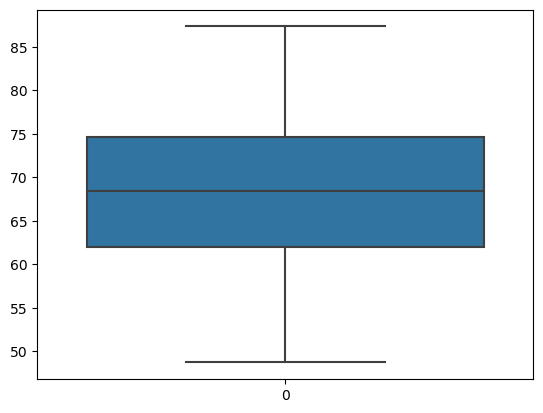

In [219]:
sns.boxplot(df['exam_score'])

In [220]:
df['exam_score'].mean()

68.73559999999999

    
    The sample mean is different from 70, but this is not sufficient evidence to prove that the population mean is not 70! 

Use a one-sample t test to compare a sample mean to a reference value. It allows you to determine whether the population mean differs from the reference value. The reference value is usually highly relevant to the subject area(Frost, n.d.).

Considering that we have a normal distribution and population standard deviation is unknown a one-sample t-test can be used.0$

the level of significance $\alpha$ = 0.05

### One-Sample T-test

In [221]:
from scipy.stats import ttest_1samp

# Null hypothesis: Mean score = 70%
# Alternative hypothesis: Mean score < 70%

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(df['exam_score'], 70)

# Since the test is one-tailed (mu < 70), we divide the p-value by 2
p_value /= 2

print("One-sample t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Significance level
alpha = 0.05

if p_value < alpha and t_stat < 0:
    print("Reject the null hypothesis: The mean score is significantly below 70%.")
else:
    print("Fail to reject the null hypothesis: The mean score is not significantly below 70%.")


One-sample t-test:
t-statistic: -0.9169771399834613
p-value: 0.18182298516031403
Fail to reject the null hypothesis: The mean score is not significantly below 70%.


The p-value = 0.18

If the p-value is $<$ $\alpha$, we reject the $H_0$, if the p-value is $\nless$ $\alpha$ then we fail to reject the $H_0$

Note in this case p-value is great than significance level $\alpha$, so we faill to reject the null-hypothesis. The difference between the sample mean and the population mean value is not statistically significant.

### Calculation manually


In [206]:

# assign the variables (metrics for ttest) and values
xbar = df['exam_score'].mean() # sample mean 
mu = 70 # The expected mean or (population mean)
s = statistics.stdev(df['exam_score']) # standard deviation 
n = len(df['exam_score']) # the sample size


print("The test Statistic: ", (xbar - mu) / (s / math.sqrt(n)))

The test Statistic:  -0.9169771399834615


In [207]:
from scipy.stats import t

# Degrees of freedom
df = 50 - 1

# Significance level
alpha = 0.05

# Critical value of the t-test (one-tailed)
# For a left-tailed test, use the entire alpha level in the left tail
t_critical_left = t.ppf(alpha, df)

print("Critical value (one-tailed, left):", t_critical_left)


Critical value (one-tailed, left): -1.6765508919142635


Critical value is a cut-off value that is used to mark the start of a region where the test statistic, obtained in hypothesis testing, is unlikely to fall in. In hypothesis testing, the critical value is compared with the obtained test statistic to determine whether the null hypothesis has to be rejected or not(CueMath, n.d.).

A one-tailed test, there will be one critical values. In this case, the T critical values is -1.6765. If the T statistic is less than the critical value, we fail to reject the null hypothesis, otherwise if it is higher we accept the alternative hypothesis.

In [223]:
# Test statistic
t_statistic = -0.9169771399834615

# Comparison with the critical value
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis: The mean score is significantly below 70%.")
else:
    print("Fail to reject the null hypothesis: The mean score is not significantly below 70%.")


Fail to reject the null hypothesis: The mean score is not significantly below 70%.


### Task 2: 

In [16]:
diamonds_df = pd.read_csv('diamonds.csv')

In [17]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The apply function will apply each element of the series to the lambda function. The lambda function will then return a value for each element based on the expression you passed to it (Abayomi Ogunbiyi, 2022). In our case, the expression was x: 1 if x in ['D', 'E', 'F'] each element.

In [18]:
# Create a new binary variable for colorless diamonds
diamonds_df['colourless'] = diamonds_df['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)


In [19]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [20]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z,colourless
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.484131
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.499753
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000


In [21]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53940 non-null  float64
 1   cut         53940 non-null  object 
 2   color       53940 non-null  object 
 3   clarity     53940 non-null  object 
 4   depth       53940 non-null  float64
 5   table       53940 non-null  float64
 6   price       53940 non-null  int64  
 7   x           53940 non-null  float64
 8   y           53940 non-null  float64
 9   z           53940 non-null  float64
 10  colourless  53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [108]:
diamonds_df.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
colourless    0
dtype: int64

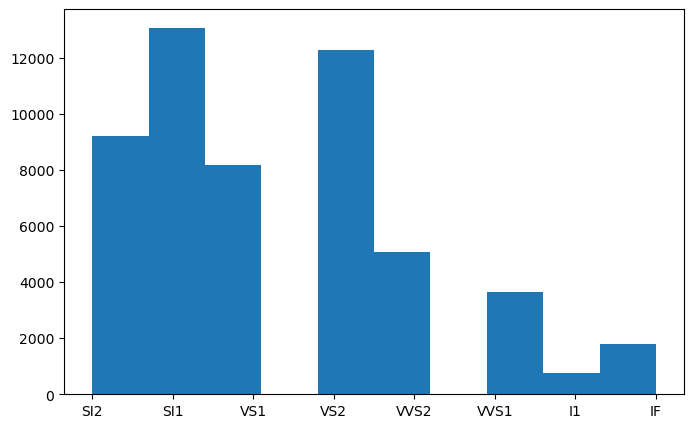

In [22]:
plt.figure(figsize=(8,5))
plt.hist(diamonds_df['clarity'])
plt.show()

A contingency table is a type of table that summarizes the relationship between two categorical variables. To create a contingency table in Python, we can use the pandas.crosstab() function (Zach, 2021).

In [23]:
#create the contingency table to colourless and clarity
cont_table = pd.crosstab(diamonds_df['colourless'], diamonds_df['clarity']) #margins=True 


In [24]:
cont_table.head()

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
colourless,,,,,,,,
0,454,1174,6425,4502,4821,5890,2013,2547
1,287,616,6640,4692,3350,6368,1642,2519


In [25]:
cont_table.shape

(2, 8)

How to read the table:
A total of 454 I1 were purchased from colourless 0.
A total of 287 I1 were purchased from colourless 1.

Our goal is to verified if we have any association between the clarity of a diamond and whether it is colourless or not. A significance 
level of alpha = 0.01.

Common Tests for Association

1. The chi square test for association:  is used to determine if there is any association between  two categorical variables. It is really a hypothesis test of independence. The null hypothesis is that the two variables are not associated, i.e., independent. The alternate hypothesis is that the two variables are associated (SPC for Excel, n.d.).
A Chi-Square test of independence uses the following null and alternative hypotheses:

H0: (null hypothesis) The two variables are independent.
H1: (alternative hypothesis) The two variables are not independent. (i.e. they are associat (Zach, 2021b).ed)
   3. 
The Cochran-Mantel-Haenszel (CMH) Tes: use when you have data from 2×2 tables that you've repeated at different times or locations. It will tell you whether you have a consistent difference in proportions across the repeats.The most common situation is that you have multiple 2×2 tables of independence; you're analyzing the kind of experiment that you'd analyze with a test of independence, and you've done the experiment multiple times or at multiple locations. There are three nominal variables: the two variables of the 2×2 test of independence, and the third nominal variable that identifies the repeats (McDonald, 2014).

4. 
Fisher’s Exact Te:  is grounded in the core statistical principle of contingency table analysis, which focuses on determining whether there is a non-random association between two categorical variables. This test is particularly suited for 2×2 contingency tables, which represent the simplest form of data classification with two variables that can each take on two different values. Compared to other statistical tests like the Chi-square test, Fisher’s test is uniquely reliable when sample sizes are small and  when the data contains cells in the contingency table with expected frequencies less than 5. In such cases, Fisher’s Exact Test is preferred due to its exact nature, not relying on any approximation or large sample assumptions(Easily, 2024).
   e55. s.
Goodman Kruska’s G s a non-parametric statistical measure identifying the correlation between two ordinal variables. It determines the direction and strength of the relationship between these data pairs to predict the future trend or values. The paired data sets should comprise ordinal variables. Ordinal variables possess categories or levels with natural order but lack specific numerical values. The paired variables should exhibit a monotonic connection whereby a rise in one variable results in an apparent increase or decrease in the rank of another variable (Choubey, 2024).For our test, we'll perform the CHI square test because the definition is exactly what we want to analyze whether or not the two categorical variables have any association, and instead of the Fisch test, the CHI square can be used for data with large frequency numbers.les.





In [126]:
from scipy.stats import chi2_contingency

#perform the Chi-Square Test 
chi2, p_value, _,_ = chi2_contingency(cont_table)
alpha = 0.01


print("\nChi-Squared Test Statistic:", chi2)
print("P-value:", p_value)

if p < alpha:
    print("Reject the null hypothesis. There is significant association between clarity and colorlessness.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between clarity and colorlessness.")



Chi-Squared Test Statistic: 486.47305941485223
P-value: 6.481587124454715e-101
Fail to reject the null hypothesis. There is no significant association between clarity and colorlessness.


Chi-square test, a p-value that is less than significance level indicates there is sufficient evidence to conclude that a relationship exists between the categorical variables.

In [133]:
res = chi2_contingency(cont_table)
res
#res.statistic

#res.pvalue

#res.dof

#res.expected_freq


Chi2ContingencyResult(statistic=486.47305941485223, pvalue=6.481587124454715e-101, dof=7, expected_freq=array([[ 382.2592881 ,  923.40637746, 6739.83481646, 4742.90404153,
        4215.16955877, 6323.52814238, 1885.50296626, 2613.39480905],
       [ 358.7407119 ,  866.59362254, 6325.16518354, 4451.09595847,
        3955.83044123, 5934.47185762, 1769.49703374, 2452.60519095]]))

<Axes: xlabel='clarity', ylabel='Count'>

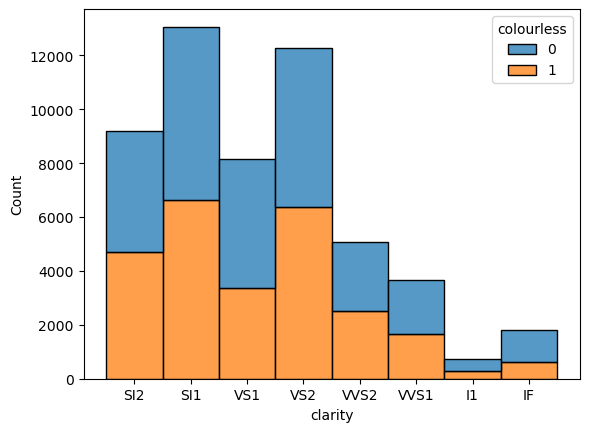

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x='clarity', hue="colourless", data=diamonds_df, stat="count", multiple="stack")

A confidence interval for a mean is a range of values that is likely to contain a population mean with a certain level of confidence. whay to do that? the reason is we want to capture our uncertainty when estimating a population, in our case a price mean of colourless and non_colorless (Zach, 2020a).

In [28]:
import numpy as np
import scipy.stats as stats

# Filter data for colorless and non-colorless diamonds
colorless_prices = diamonds_df[diamonds_df['colourless'] == 1]['price']
non_colorless_prices = diamonds_df[diamonds_df['colourless'] == 0]['price']

# Calculate mean and standard deviation for colorless diamonds
mean_colorless = np.mean(colorless_prices)
std_colorless = np.std(colorless_prices)

# Calculate mean and standard deviation for non-colorless diamonds
mean_non_colorless = np.mean(non_colorless_prices)
std_non_colorless = np.std(non_colorless_prices)

# Calculate 90% confidence intervals for both groups
conf_int_colorless = stats.norm.interval(0.90, loc=mean_colorless, scale=std_colorless/np.sqrt(len(colorless_prices)))
conf_int_non_colorless = stats.norm.interval(0.90, loc=mean_non_colorless, scale=std_non_colorless/np.sqrt(len(non_colorless_prices)))

print("90% Confidence Interval for Mean Price of Colorless Diamonds:", conf_int_colorless)
print("90% Confidence Interval for Mean Price of Non-Colorless Diamonds:", conf_int_non_colorless)


90% Confidence Interval for Mean Price of Colorless Diamonds: (3301.85947692509, 3373.6593252499883)
90% Confidence Interval for Mean Price of Non-Colorless Diamonds: (4448.7802444452245, 4533.679900742729)


There is only a 10% chance that the true mean price lies outside of the 90% confidence interval. That is, there’s only a 10% chance that the true mean price of colorless is greater than 3373.6593252499883 or less than 3301.85947692509.

There is only a 10% chance that the true mean price lies outside of the 90% confidence interval. That is, there’s only a 10% chance that the true mean price of Non-Colorless is greater than 4533.679900742729 or less than 4448.7802444452245.

### Task 3: 

In [83]:
from pydataset import data
import pandas as pd

plantg = data('PlantGrowth')

In [29]:
from pydataset import data
import pandas as pd

#plantg = pd.read_csv('PlantGrowth.csv')

In [84]:
plantg.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [86]:
plantg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [85]:
plantg.shape

(30, 2)

In [33]:
plantg['group'].unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [87]:
plantg.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups (pandas.pydata.org, n.d.).
The criteria in our case is the column “group”.

In [88]:
plantg.groupby('group')['weight'].describe()        

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
ctrl,10.0,5.032,0.583091,4.17,4.5500,5.155,5.2925,6.11
trt1,10.0,4.661,0.793676,3.59,4.2075,4.550,4.8700,6.03
trt2,10.0,5.526,0.442573,4.92,5.2675,5.435,5.7350,6.31


<Axes: xlabel='group', ylabel='weight'>

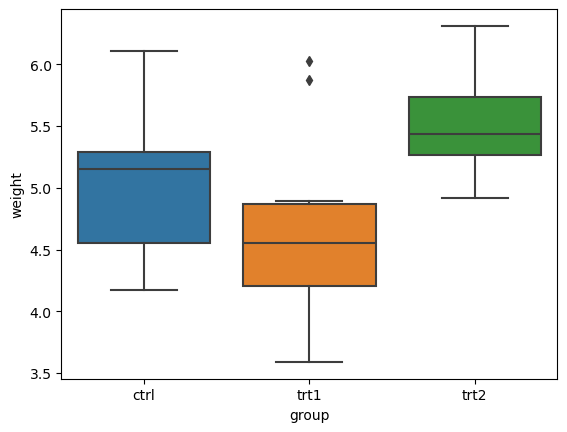

In [89]:
sns.boxplot(x='group',y='weight',data=plantg)

The ctrl treatment showed the greatest variability in scores and may be skewed to the left. In comparison, the trt1 treatment had the lowest average weight, while the trt2 treatment had the highest average weight among the three.

Anova has two types of test: one-way and two way (can be with or without replication).
one-way between group used to test two groups to see if there's a difference between them. one way has one independent variable affecting a dependent variable. the one way tell that at least two groups were different from each other. But it won't tell you which groups were different. 
Two way has two independent variable. two way is used when you have one quantitative outcome and you have two categorical explanatory variables
Two way without replication used when you have one group an you're double-testing that same group. Two way ANOVA with replication: Two groups, and the members of those groups are doing more than one thing (Statistics How To, n.d.).

The purpose of a one-way ANOVA (analysis of variance) test is to determine the existence of a statistically significant difference among the means of three or more populations.  The test actually uses variances to help determine if the population means are equal or not.

The following assumptions are required to use a one-way ANOVA test:


Each population from which a sample is taken is normally distributed.
All samples are randomly selected and independently taken from the populations.
The populations are assumed to have equal variances.
The population data is numerical (interval or ratio level).(Watts, 2022).

hypoyhesis
h0 = all means are equal
hA =  at least one population mean is different from the others


In [90]:
 #ANOVA test
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(plantg[plantg['group'] == 'ctrl']['weight'],
                                plantg[plantg['group'] == 'trt1']['weight'],
                                plantg[plantg['group'] == 'trt2']['weight'])

alpha = 0.05
print("\nANOVA Test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


ANOVA Test:
F-statistic: 4.846087862380136
p-value: 0.0159099583256229


In [91]:
p_value: 0.0159099583256229

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The differences between some of the means are statistically significant.")
else:
    print("Fail to reject the null hypothesis: The differences between the means are not statistically significant.")


Reject the null hypothesis: The differences between some of the means are statistically significant.


The p-value is less than significance level (0.05), so reject the null hypothhesis and conclude that not all population means are equal.

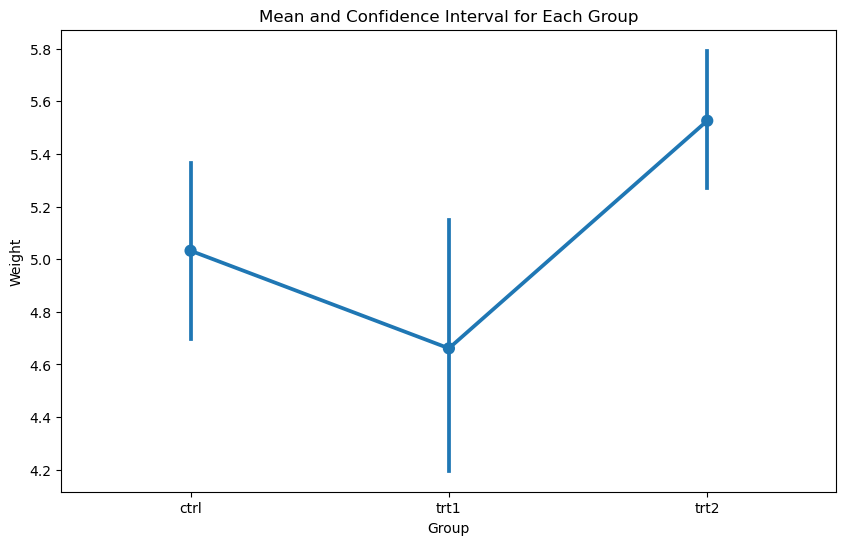

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
sns.pointplot(x='group', y='weight', data=plantg, ci=95)
plt.title('Mean and Confidence Interval for Each Group')
plt.xlabel('Group')
plt.ylabel('Weight')
plt.show()


In the interval plot, trt1 has the lowest mean and trt2 has the highest. but just with this graph, we cannot determine whether any differences are statistically significant.

To determine where the difference between means may lie, I will utilize two methods: the Tukey method and the Dunnett method.
Tukey method: ANOVA will tell you if there are differences among the levels of the independent variable, but not which differences are significant. To find how the treatment levels differ from one another, perform a TukeyHSD (Tukey’s Honestly-Significant Difference) post-hoc test.y)
The Tukey test runs pairwise comparisons among each of the groups, and uses a conservative error estimate to find the groups which are statistically different from one ano (scipy.github.io, n.d.)th
aDs.
dunnett method: is used in ANOVA to create confidence intervals for differences between the mean of each factor level and the mean of a control group. If an interval contains zero, then there is no significant difference between the two means under comparison. You specify a family error rate for all comparisons, and Dunnett's method determines the confidence levels for each individual comparison accordingly (Minitab support, n.d.).

In [93]:
from scipy.stats import dunnett
trt1 = plantg[plantg['group'] == 'trt1']['weight']
trt2 = plantg[plantg['group'] == 'trt2']['weight']
crt1 = plantg[plantg['group'] == 'ctrl']['weight']

res = dunnett(trt1, trt2, control = crt1)
res.pvalue

print(res)

Dunnett's test (95.0% Confidence Interval)
Comparison               Statistic  p-value  Lower CI  Upper CI
 (Sample 0 - Control)     -1.331     0.323    -1.021     0.279
 (Sample 1 - Control)      1.772     0.153    -0.156     1.144




The p-value (0.323) corresponding with the comparison between sample 0 (trt1)  and control exceeds 0.05.
The p-value (0.154) corresponding with the comparison between sample 0 (trt2)  and control exceeds 0.05.

This means we do not have sufficient evidence to say that there is a difference between the control treatment and the two treatments (trt1 and trt2).
Therefore, there is no significant evidence that the means of treatment compared to the control group differ. So in this case we "Fail to reject the null hypothesis: The differences between the means are not statistically significant."
p.

In [94]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=plantg['weight'],
                          groups=plantg['group'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


According to Tukey's method, the only one that has a statistically evident difference is the comparison between trt1 and trt2  the p-adj (0.012) is less than the alpha value 0.05, so in this case, we can reject the null hypothesis and accept that the 'differences between some of the means are statistically significant'. 

### Task 4: 

In [95]:
from pydataset import data
import pandas as pd
from scipy.stats import pearsonr


trees = data('trees')


In [80]:
trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


In [96]:
trees.shape

(31, 3)

In [97]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 992.0 bytes


In [98]:
trees.describe()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


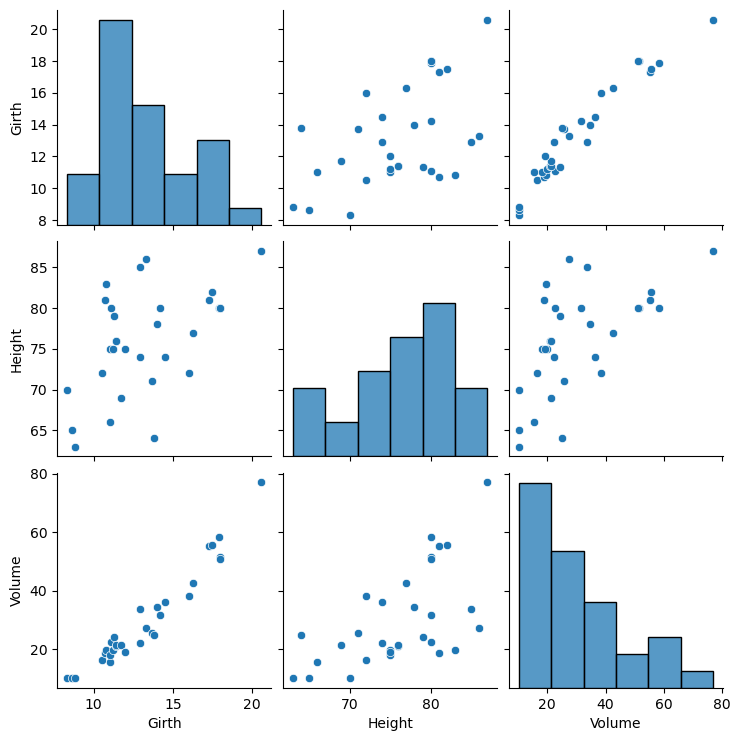

In [103]:
sns.pairplot(trees)
plt.show()

o pairplot nos mostra que temos uma boa approximately linear relationship between girth and volume. mas  girth/heigh e height/volume nao tem uma boa aproximacao linear.  

In [109]:
trees.isnull().sum()

Girth     0
Height    0
Volume    0
dtype: int64

In [111]:
trees.duplicated().sum()

0

identificar se tem outliers nos dados

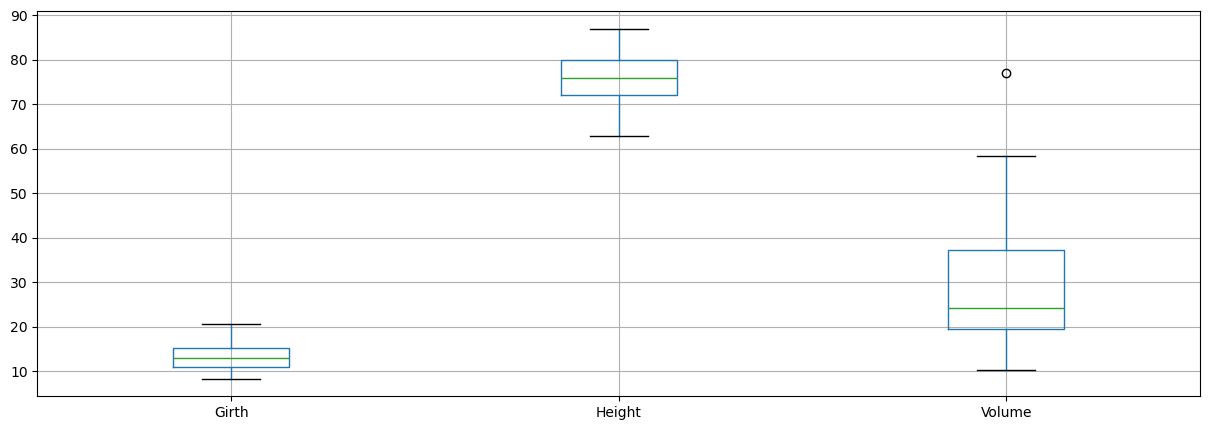

In [115]:
boxplot = trees.boxplot(figsize= (15, 5))  

Fisrt goal: a. Perform a correlation analysis between all numerical variables. Include and comment on 
the results of hypothesis tests for the population correlation coefficients between all three 
pairs of variables (you can use the pearsonr function from the scipy.stats library).

The Pearson correlation coefficient [1] measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases(Scipy.org, 2019).

Pearson’s correlation coefficients measure only linear relationships. Consequently, if your data contain a curvilinear relationship, the Pearson correlation coefficient will not detect it (Frost, 2018). 

ρ = population correlation coefficient

Null hypothesis: There is no linear relationship between the two variables. ρ = 0.

Alternative hypothesis: There is a linear relationship between the two variables. ρ ≠ 0.

In [122]:
from scipy import stats

# Apply the pearsonr()
res = stats.pearsonr(trees['Girth'], trees['Height'])
res

PearsonRResult(statistic=0.5192800719499373, pvalue=0.0027578147930576663)

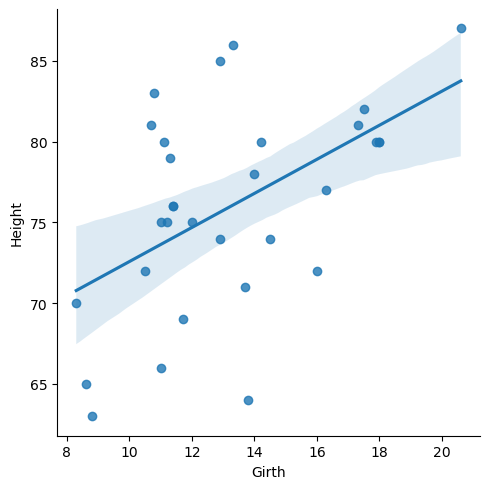

In [142]:
#The easiest way to “add” a best-fit line to a scatterplot is to use a different plotting method. Seaborn’s lmplot() method (where “lm” stands for “linear model”)(www.sfu.ca, n.d.). 

sns.lmplot(x="Girth", y="Height", data=trees)


The coefficient R 0.519 fits in a positive relationship and the p-value is less than 0.05 with these results we can reject the null hypothesis. There is sufficient evidence to conclude that there is a linear relationship between Girth (x) and Height (y) because the correlation coefficient is significantly different from zero. When the distance between the points on the drawn line is not very close, it suggests a moderate correlation, as indicated by a correlation coefficient of 0.519.

In [124]:
# Apply the pearsonr()
res = stats.pearsonr(trees['Height'], trees['Volume'])
res

PearsonRResult(statistic=0.5982496519917823, pvalue=0.00037838234791848544)

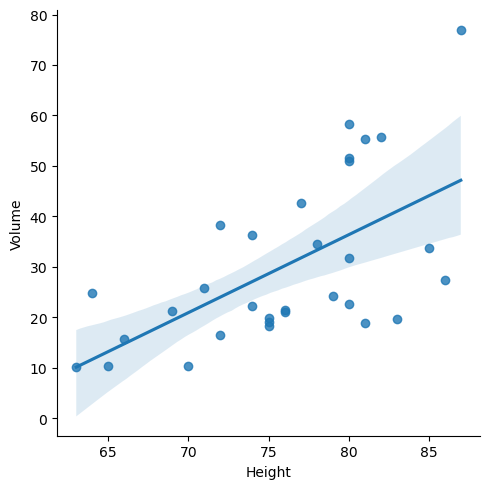

In [143]:
sns.lmplot(x="Height", y="Volume", data=trees)

The same occurs in height and volume, if there is a positive relationship the p-value is less than 0.05, however we have a moderate correlation, since according to the graph the points are far from each other.

In [123]:
# Apply the pearsonr()
res = stats.pearsonr(trees['Girth'], trees['Volume'])
res

PearsonRResult(statistic=0.9671193682556305, pvalue=8.6443342117705775e-19)

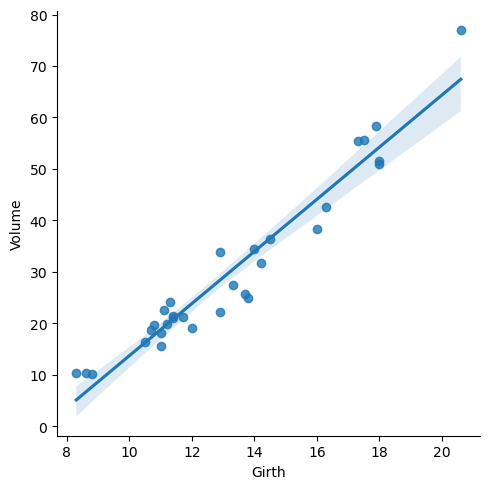

In [144]:
sns.lmplot(x="Girt", y="Volume", data=trees)

The correlation coefficient between 'Girth' and 'Volume' is 0.967, which is higher compared to the other values obtained. The points on the graph are close to each other,  forming a perfect line and indicating a very strong linear relationship. A positive correlation implies that as 'Girth' increases, so does 'Volume'. Therefore, we can reject the null hypothesis since the p-value is less than 0.05 and the correlation coefficient is different from zero.

multiple linear regression

Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship (Yadav, 2021).

### Model 1: Girth + Height

In [146]:
import statsmodels.api as sm

#define response variable
y = trees['Volume']

#define predictor variables
x = trees[['Girth', 'Height']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model1 = sm.OLS(y, x).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     255.0
Date:                Fri, 17 May 2024   Prob (F-statistic):           1.07e-18
Time:                        20:31:47   Log-Likelihood:                -84.455
No. Observations:                  31   AIC:                             174.9
Df Residuals:                      28   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.9877      8.638     -6.713      0.0

Results
Model 1 (Girt + Height): The R-squared is 0.948, which is our coefficient of determination, which indicates that 94.8 of volume can be explained by Girth and Height, and looking at the p-value of both, we can say that the two are quite significant to predict volume, but girth is more important since its p-value is equal to zero, i.e. less than the alpha significance level of .05.

### Model 2: Height

In [148]:
import statsmodels.api as sm

#define response variable
y = trees['Volume']

#define predictor variables
x = trees[['Height']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model2 = sm.OLS(y, x).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     16.16
Date:                Fri, 17 May 2024   Prob (F-statistic):           0.000378
Time:                        20:33:33   Log-Likelihood:                -123.40
No. Observations:                  31   AIC:                             250.8
Df Residuals:                      29   BIC:                             253.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.1236     29.273     -2.976      0.0

Model 2 (Height): The R-squared is 0.358, which indicates that 35.8% of volume can be explained by height, and looking at the p-value, we can say that the height is statistically significant to predict volume. However, it only predicts 35.8% of volume, so the model fit is poor compared to Model 1.

### Model 3 : Girth

In [150]:
import statsmodels.api as sm

#define response variable
y = trees['Volume']

#define predictor variables
x = trees['Girth']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model3 = sm.OLS(y, x).fit()

#view model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Fri, 17 May 2024   Prob (F-statistic):           8.64e-19
Time:                        20:35:03   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9435      3.365    -10.978      0.0

Results
Model 3 (Girt): The R-squared is 0.935, which indicates that 93.5% of volume can be explained by girth, and looking at the p-value, we can say that the girth is highly statistically significant (p-value=0.000) to predict volume. 

Text(0, 0.5, 'Volume')

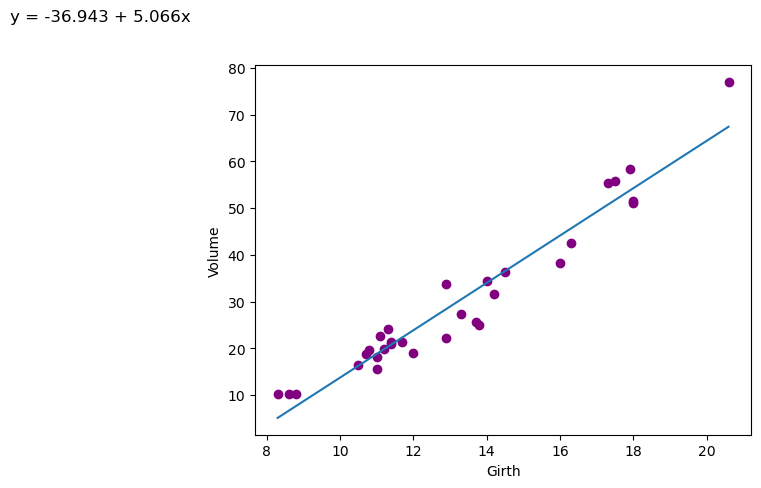

In [160]:
import matplotlib.pyplot as plt

# Find line of best fit
a, b = np.polyfit(trees['Girth'].values, trees['Volume'], 1)

# Add points to plot
plt.scatter(trees['Girth'], trees['Volume'], color='purple')

# Add line of best fit to plot
plt.plot(trees['Girth'], a * trees['Girth'] + b)

# Add fitted regression equation to plot
plt.text(1, 90, 'y = {:.3f} + {:.3f}x'.format(b, a), size=12)

# Add axis labels
plt.xlabel('Girth')
plt.ylabel('Volume')


Among the three linear regression models, the ones that best estimate volume are models 1 and 3. Model 1 explains 94.8% of the volume, being one of those that would indicate estimating the volume. However, model 3 would also be a great option for this since it uses only one predictor variable and still has an accuracy of 93.5%, which is very good.

References

Abayomi Ogunbiyi, I. (2022). How the Python Lambda Function Works – Explained with Examples. [online] freeCodeCamp.org. Available at: https://www.freecodecamp.org/news/python-lambda-function-explained/ [Accessed 16 May 2024].

Biostats. (n.d.). Test for normality – Shapiro-Wilk test – bioST@TS. [online] Available at: https://biostats.w.uib.no/test-for-normality-shapiro-wilks-test/ [Accessed 11 May 2024].

Choubey, P. (2024). Goodman And Kruskal’s Gamma. [online] wallstreetmojo. Available at: https://www.wallstreetmojo.com/goodman-and-kruskals-gamma/#Assumptions [Accessed 12 May 2024].

CueMath (n.d.). Critical Value - Formula, Definition, Examples, Types. [online] Cuemath. Available at: https://www.cuemath.com/data/critical-value/ [Accessed 11 May 2024].

Easily, L.S. (2024). Fisher’s Exact Test: A Comprehensive Guide. [online] LEARN STATISTICS EASILY. Available at: https://statisticseasily.com/fishers-exact-test/ [Accessed 12 May 2024].

Frost, J. (2018). Interpreting Correlation Coefficients. [online] Statistics By Jim. Available at: https://statisticsbyjim.com/basics/correlations/ [Accessed 16 May 2024].

Frost, J. (n.d.). T Test Overview: How to Use & Examples. [online] Statistics By Jim. Available at: https://statisticsbyjim.com/hypothesis-testing/t-test/ [Accessed 10 May 2024].

Malato, G. (2023). An Introduction to the Shapiro-Wilk Test for Normality | Built In. [online] builtin.com. Available at: https://builtin.com/data-science/shapiro-wilk-test [Accessed 11 May 2024].

McDonald, J.H. (2014). Cochran–Mantel–Haenszel test - Handbook of Biological Statistics. [online] Bio Stat Handbook. Available at: https://www.biostathandbook.com/cmh.html [Accessed 12 May 2024].

Mello, M. (2012). Qual teste estatístico devo usar? [online] Sobrevivendo na Ciência. Available at: https://marcoarmello.wordpress.com/2012/05/17/qualteste/ [Accessed 11 May 2024].

Minitab support. (n.d.). What is Dunnett’s method for multiple comparisons? [online] Available at: https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/anova/supporting-topics/multiple-comparisons/what-is-dunnett-s-method/ [Accessed 14 May 2024].

Mishra, P., Pandey, C.M., Singh, U., Sahu, C., Keshri, A. and Gupta, A. (2019). Descriptive Statistics and Normality Tests for Statistical Data. Annals of Cardiac Anaesthesia, [online] 22(1), pp.67–72. doi:https://doi.org/10.4103%2Faca.ACA_157_18.

Pandas.pydata.org. (n.d.). pandas.DataFrame.groupby — pandas 1.3.0 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html [Accessed 13 May 2024].

RCODER. (2023). Lilliefors normality test in R. [online] Available at: https://r-coder.com/lilliefors-test-r/ [Accessed 11 May 2024].

Real-statistics.com. (2024). One-Sample Anderson-Darling Test. [online] Available at: https://real-statistics.com/non-parametric-tests/goodness-of-fit-tests/anderson-darling-test/ [Accessed 11 May 2024].

scipy.github.io. (n.d.). scipy.stats.tukey_hsd — SciPy v1.14.0.dev Manual. [online] Available at: https://scipy.github.io/devdocs/reference/generated/scipy.stats.tukey_hsd.html [Accessed 14 May 2024].

Scipy.org. (2019). scipy.stats.pearsonr — SciPy v1.3.2 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html [Accessed 17 May 2024].

SPC for Excel. (n.d.). Chi Square Test for Association. [online] Available at: https://www.spcforexcel.com/help/statistical-tools/miscellaneous/chi-association/ [Accessed 12 May 2024].

Statistics How To. (n.d.). ANOVA Test: Definition, Types, Examples. [online] Available at: https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/#TwoWay [Accessed 14 May 2024].

Support.minitab.com. (n.d.). Test for normality. [online] Available at: https://support.minitab.com/en-us/minitab/help-and-how-to/statistics/basic-statistics/supporting-topics/normality/test-for-normality/#:~:text=Kolmogorov-Smirnov%20normality%20test%20This%20test%20compares%20the%20ECDF [Accessed 11 May 2024].

Watts, V. (2022). 11.4 One-Way ANOVA and Hypothesis Tests for Three or More Population Means. ecampusontario.pressbooks.pub. [online] Available at: https://ecampusontario.pressbooks.pub/introstats/chapter/11-4-one-way-anova-and-hypothesis-tests-for-three-or-more-population-means/ [Accessed 13 May 2024].

www.sfu.ca. (n.d.). 7. Correlation and Scatterplots — Basic Analytics in Python. [online] Available at: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html [Accessed 17 May 2024].

Yadav, H. (2021). Multiple Linear Regression Implementation in Python. [online] Machine Learning with Python. Available at: https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c [Accessed 17 May 2024].

Zach (2020a). Confidence Interval for a Mean. [online] Statology. Available at: https://www.statology.org/confidence-interval-mean/.

Zach (2020b). How to Perform a Shapiro-Wilk Test in Python. [online] Statology. Available at: https://www.statology.org/shapiro-wilk-test-python/ [Accessed 10 May 2024].

Zach (2021a). How to Create a Contingency Table in Python. [online] Statology. Available at: https://www.statology.org/contingency-table-python/ [Accessed 12 May 2024].

Zach (2021b). The Four Assumptions of a Chi-Square Test. [online] Statology. Available at: https://www.statology.org/chi-square-test-assumptions/ [Accessed 12 May 2024].